Name-Jainam Shah
ID-DIRSS2131

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Student_Marks - Sheet1.csv")
df.head()
#reading the data set 

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  131 non-null    int64  
 1   time_study      127 non-null    float64
 2   Marks           122 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.2 KB


(131, 3)

In [ ]:
#i am going to check for descriptipe stats from the given dataset
df.describe()

,number_courses,time_study,Marks
count,131.000000,127.000000,122.000000
mean,5.251908,3.880661,23.427475
std,1.820159,2.340316,13.812173
min,2.000000,0.096000,5.609000
25%,4.000000,1.968000,12.151250
50%,5.000000,3.919000,19.680500
75%,7.000000,6.103000,32.076750
max,8.000000,7.957000,55.299000


In [ ]:
#Checking For null Values
df.isnull().sum()

number_courses    0
time_study        4
Marks             9
dtype: int64

Above ,as seen there are null values in time_study and marks columns

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

18

In [ ]:
#as seen,there are duplicate values in the data,so before moving forward lets remove duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
#Checking for duplicate values again
df.duplicated().sum()

0

In [ ]:
#Checking the unique values in the columns
df.nunique()

number_courses      7
time_study         99
Marks             100
dtype: int64

In [ ]:
#Checking unique values in number of courses
df['number_courses'].unique()

array([3, 4, 6, 8, 5, 2, 7])

Before filling in the missing valyues we are going to visualise data

# Data Visualisation

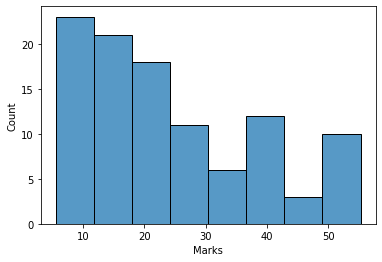

In [ ]:
sns.histplot(df['Marks'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


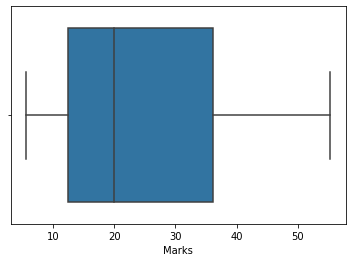

In [ ]:
sns.boxplot(df['Marks'])

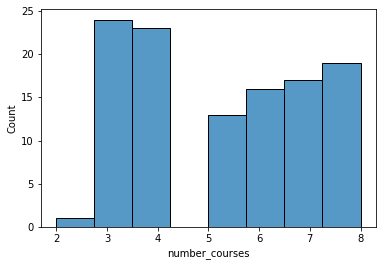

In [ ]:
sns.histplot(df['number_courses'])

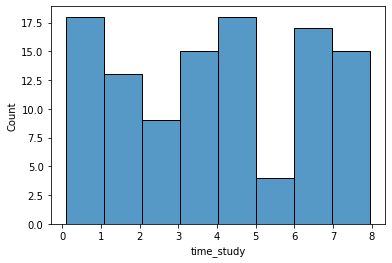

In [ ]:
sns.histplot(df['time_study'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


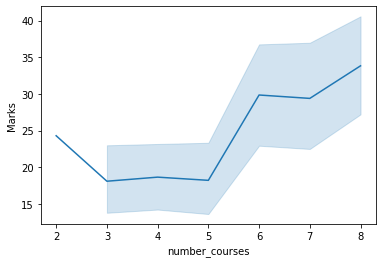

In [ ]:
sns.lineplot(df['number_courses'],df['Marks'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


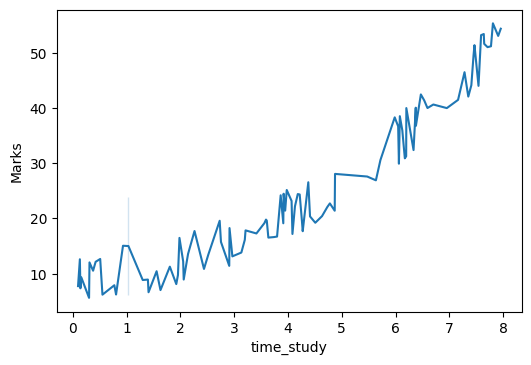

In [ ]:
plt.figure(dpi = 100)
sns.lineplot(df['time_study'],df['Marks'])

Text(0, 0.5, 'Marks')

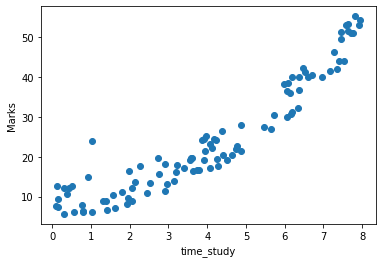

In [ ]:
plt.scatter(df['time_study'],df['Marks'])
plt.xlabel('time_study')
plt.ylabel('Marks')
#here we can see that there is somwwhat direct relation between marks and time study

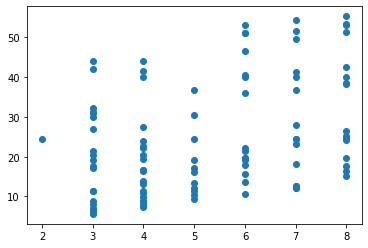

In [ ]:
plt.scatter(df['number_courses'],df['Marks'])

Filling the Null values


In [ ]:
df['time_study'].fillna(df['time_study'].mean(),inplace=True)

In [ ]:
df['Marks'].fillna(df['Marks'].mean(),inplace=True)

In [ ]:
#Cheking for null values again
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

We have no null values in our dataset,we also removed duplicates from the data.Lets check for co relation

In [ ]:
df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.157661,0.399857
time_study,0.157661,1.000000,0.900915
Marks,0.399857,0.900915,1.000000


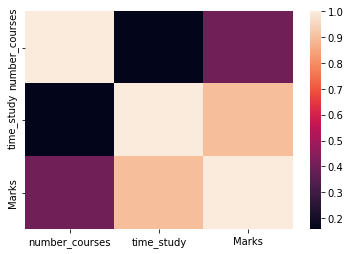

In [ ]:
sns.heatmap(df.corr())

# Creating Model

In [ ]:
df.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [ ]:
X=df[['number_courses', 'time_study']]
Y=df[['Marks']]

In [ ]:
#splitting The dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 5)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('Training set score : ', reg.score(x_train,y_train))
print('Testing set score  : ', reg.score(x_test, y_test))

Training set score :  0.8697980122500455
Testing set score  :  0.8910765864067242
